In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("wine.csv", delimiter=";")

In [64]:
display(df)
print(f"the column where at least a column is null are: {sum(df.isnull().sum())}")
print(f"the shape of the dataset is the following: {df.shape}")
count = df.isnull().sum()
print("\nMissing values per column")
print(count.to_string())

,class,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


the column where at least a column is null are: 0
the shape of the dataset is the following: (178, 14)

Missing values per column
class                   0
alcohol                 0
malic acid              0
ash                     0
alcalinity              0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
color intensity         0
hue                     0
od280/od315             0
proline                 0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity            178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280/od315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [56]:
df.describe()

,class,alcohol,malic acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


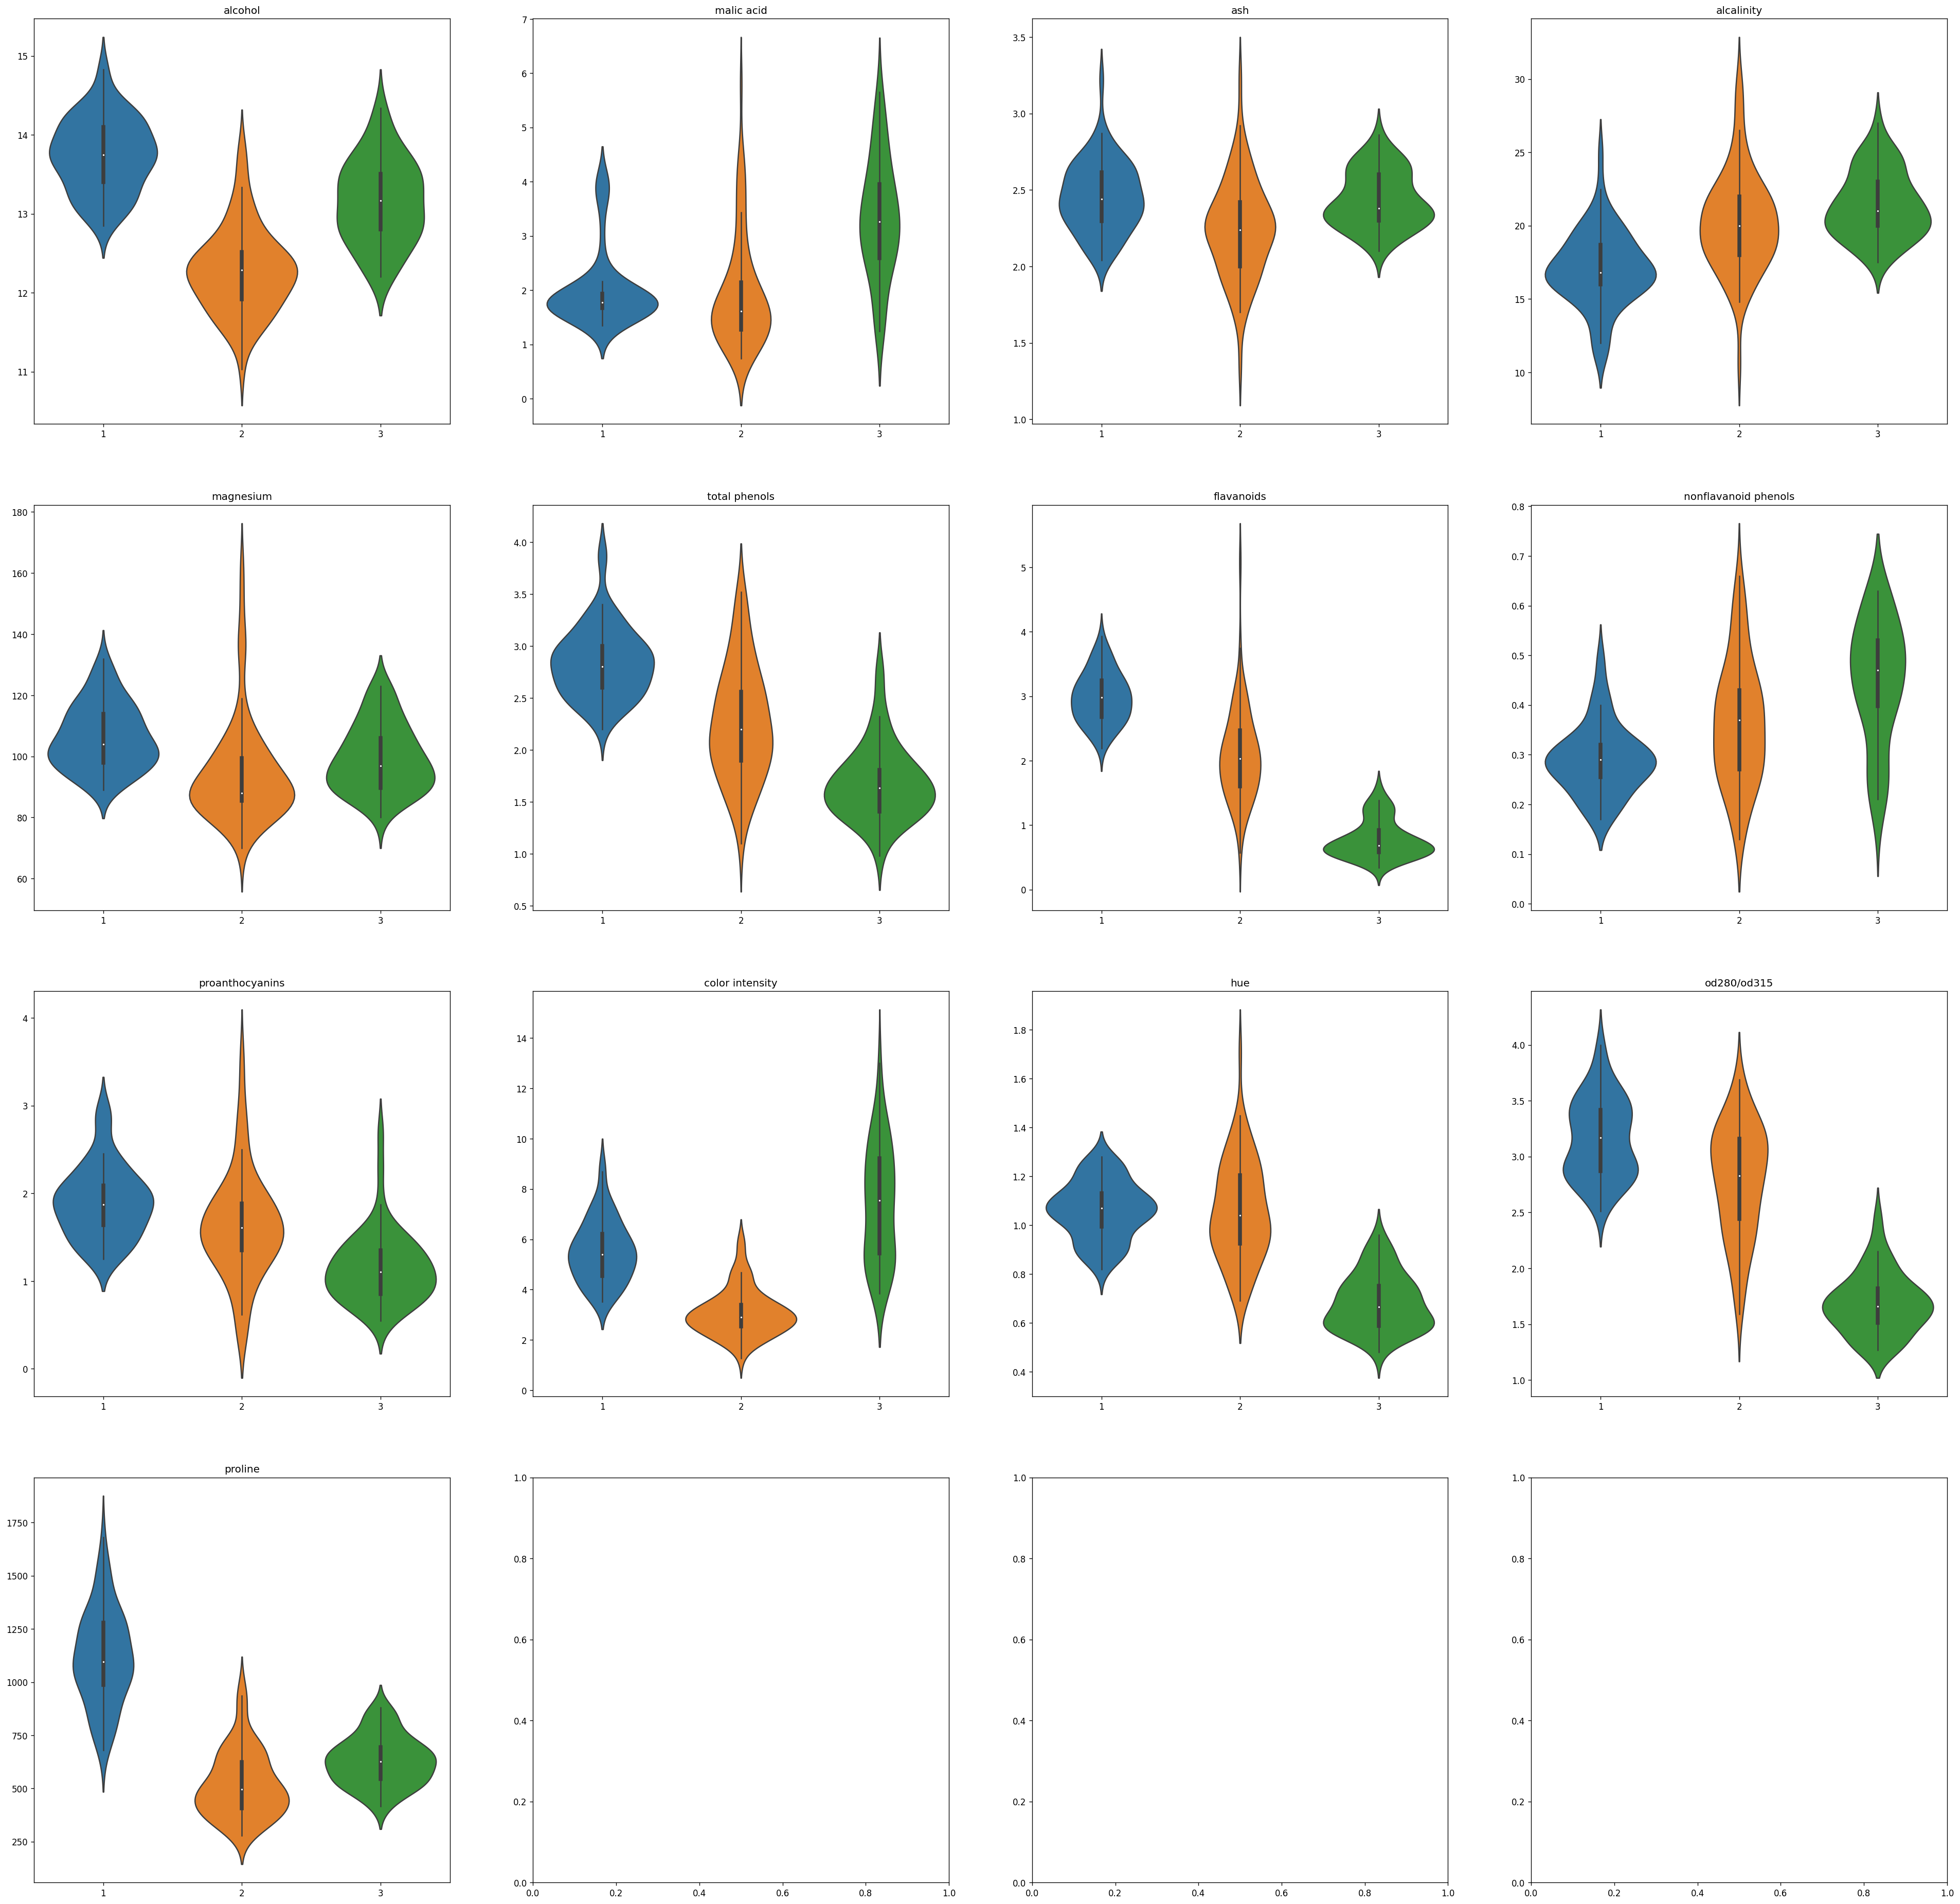

In [57]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(40,40), dpi=120)
for ind, feature in enumerate(df.keys()[1:]):
    row = ind/4
    column = ind%4
    fig = sns.violinplot(data=df, y=feature,
        ax=axs[int(row)][column],
    x='class').set_title(feature)
    axs[int(row)][column].set_xlabel("")
    axs[int(row)][column].set_ylabel("")
plt.show()

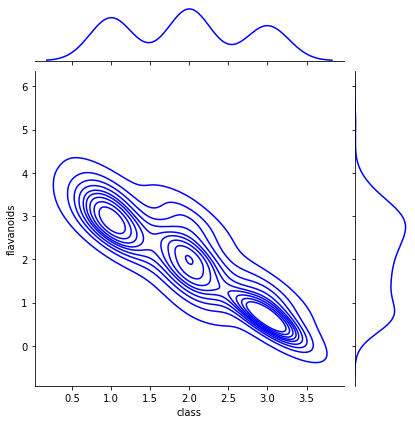

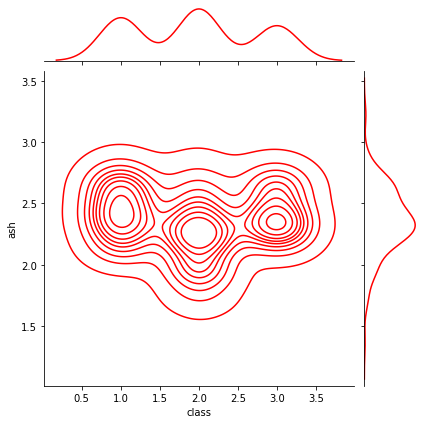

In [58]:
sns.jointplot(data=df, x="class", y="flavanoids", color="blue", kind="kde")
sns.jointplot(data=df, x="class", y="ash", color="red", kind="kde")

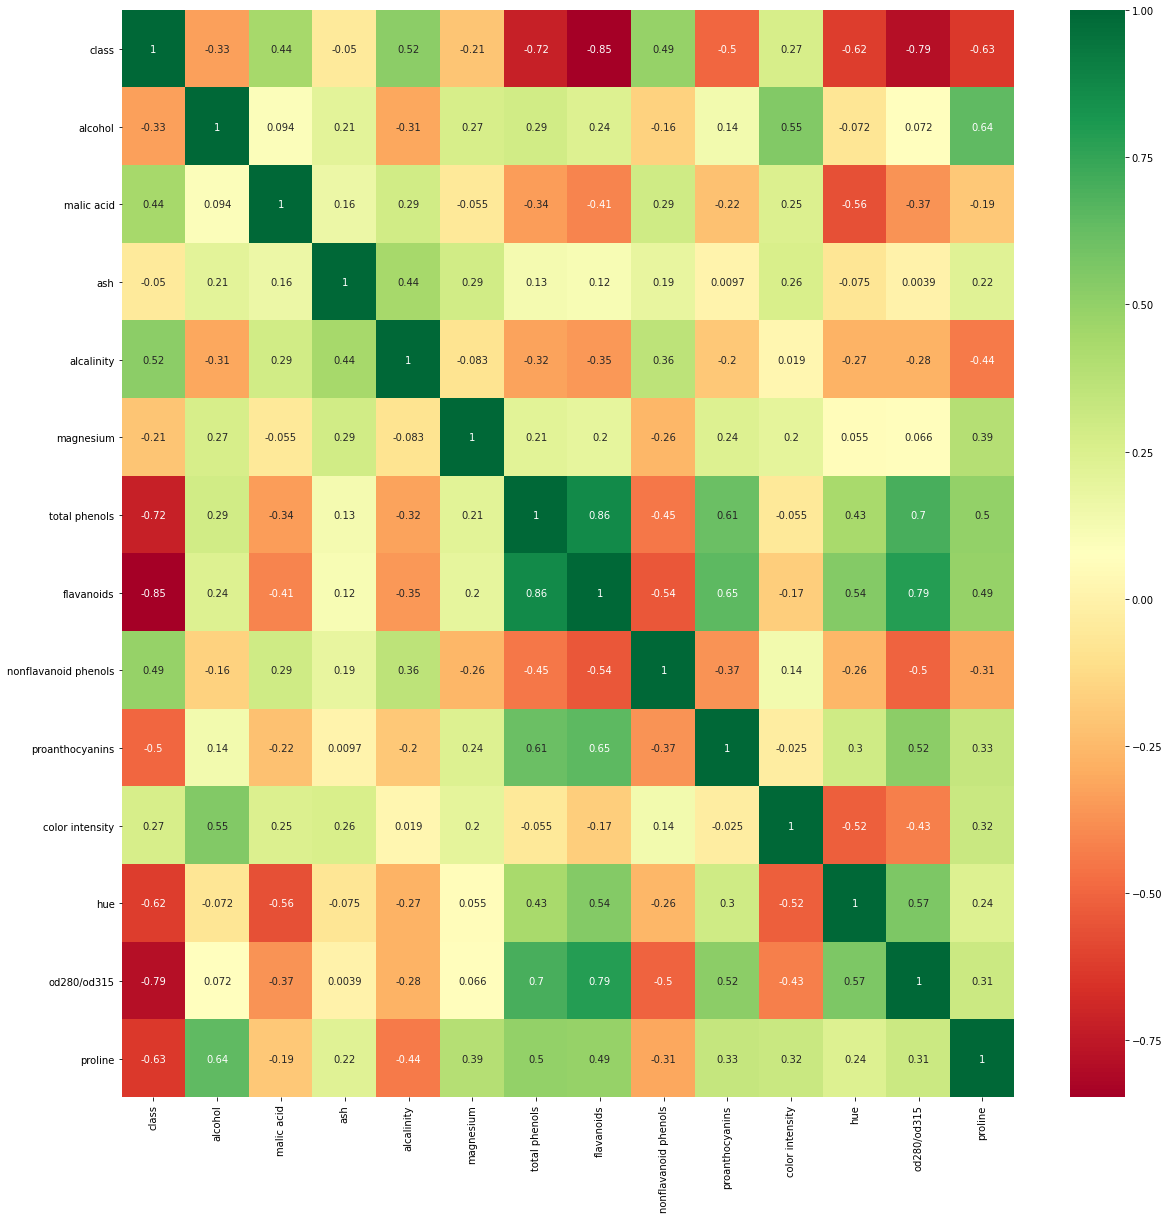

In [59]:
corrmat = df.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(df[top_corr_feat].corr(), annot=True,cmap="RdYlGn")

In [61]:
X = df.loc[:, df.columns != "class"]
y = df["class"]
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcol= pd.DataFrame(X.columns)
featureScores = pd.concat([dfcol,dfscores],axis=1)
featureScores.columns = ['Feature','Chi2-Score']
print(featureScores.nlargest(13,'Chi2-Score'))

                 Feature    Chi2-Score
12               proline  16540.067145
9        color intensity    109.016648
6             flavanoids     63.334308
4              magnesium     45.026381
3             alcalinity     29.383695
1             malic acid     28.068605
11           od280/od315     23.389883
5          total phenols     15.623076
8        proanthocyanins      9.368283
0                alcohol      5.445499
10                   hue      5.182540
7   nonflavanoid phenols      1.815485
2                    ash      0.743381


[0.13895378 0.03264202 0.00799365 0.01945846 0.03011193 0.04660683
 0.1511188  0.01427289 0.0213053  0.18893985 0.07363199 0.1150901
 0.15987441]


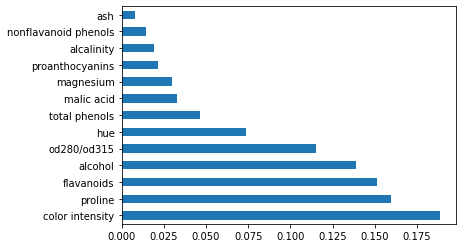

In [62]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_imp=pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(13).plot(kind='barh')
plt.show()